# PCA - Principal Component Analysis
### Principal component analysis (PCA) can be used in detecting outliers. PCA is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

### In this procedure, covariance matrix of the data can be decomposed to orthogonal vectors, called eigenvectors, associated with eigenvalues. The eigenvectors with high eigenvalues capture most of the variance in the data.

### Therefore, a low dimensional hyperplane constructed by k eigenvectors can capture most of the variance in the data. However, outliers are different from normal data points, which is more obvious on the hyperplane constructed by the eigenvectors with small eigenvalues.

### Therefore, outlier scores can be obtained as the sum of the projected distance of a sample on all eigenvectors
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.pca

### Arguments that work with PCA algorithm:
1. n_components
2. n_selected_components
3. contamination
4. copy
5. whiten
6. svd_solver
7. tol
8. iterated_power
9. random_state
10. weighted
11. standardization

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   210.042210 seconds
image downsampling       ...took     6.533480 seconds
image downsampling       ...took     9.962794 seconds
image downsampling       ...took    13.154391 seconds
image downsampling       ...took    16.812835 seconds
image downsampling       ...took    20.537781 seconds
image downsampling       ...took    28.298071 seconds
image downsampling       ...took    34.175327 seconds
image downsampling       ...took    36.144511 seconds
image downsampling       ...took    38.764073 seconds
image downsampling       ...took    45.437752 seconds
image downsampling       ...took    51.181297 seconds
image downsampling       ...took    56.571504 seconds
image downsampling       ...took    71.912358 seconds
image downsampling       ...took    74.160792 seconds
image downsampling       ...took    76.861789 seconds
image downsampling       ...took    81.101599 seconds
image downsampling       ...took    85.350276 seconds
image downsampling       ...

(64, 64)


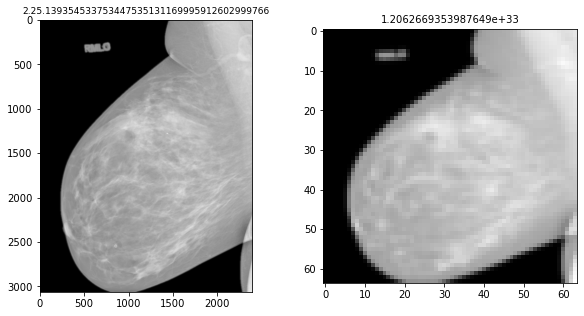

(64, 64)


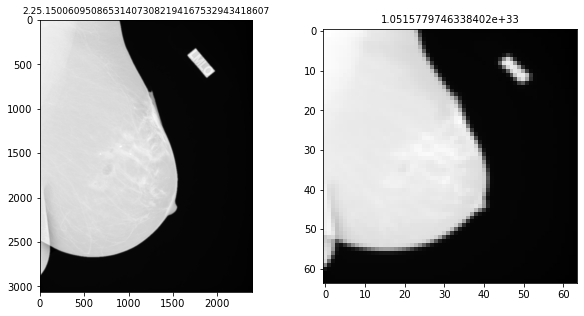

(64, 64)


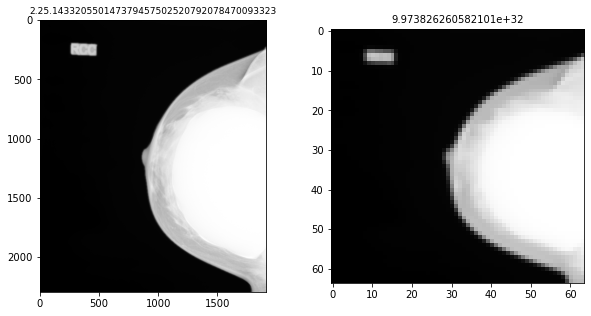

(64, 64)


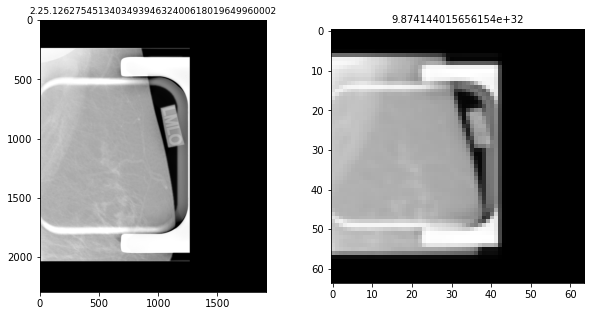

(64, 64)


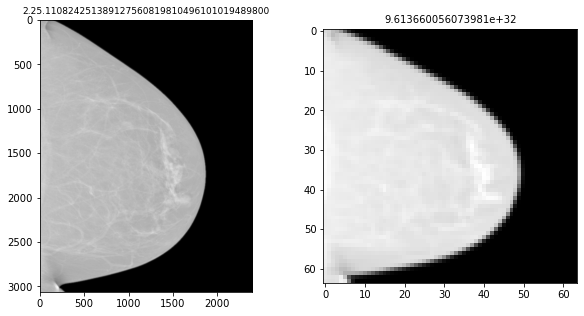

(64, 64)


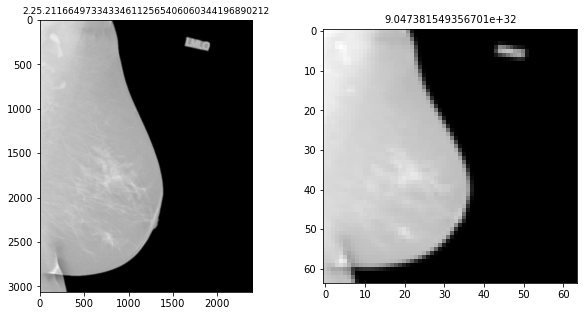

(64, 64)


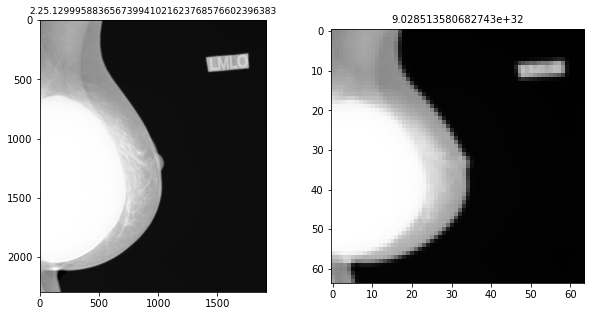

(64, 64)


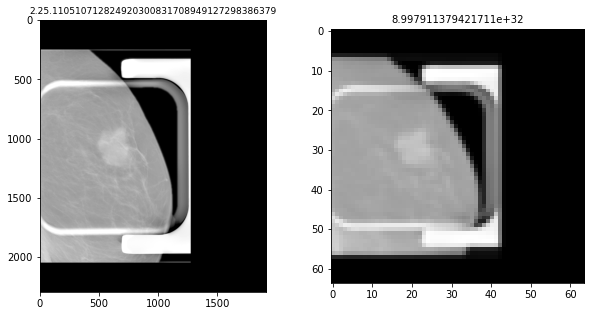

(64, 64)


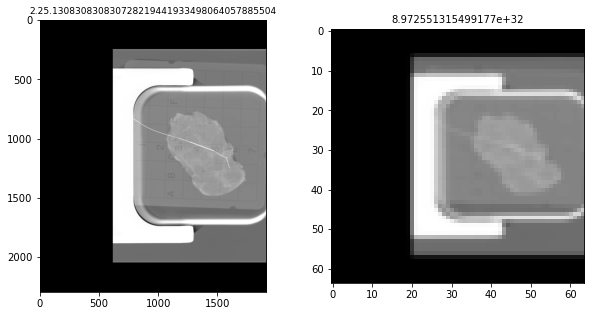

(64, 64)


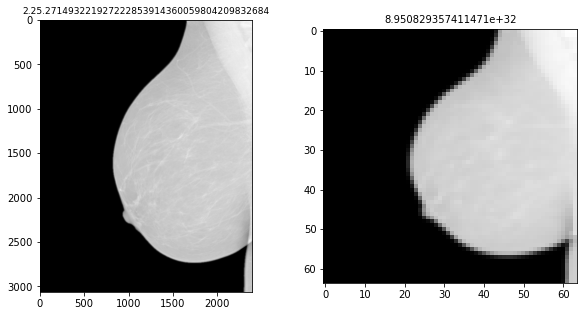

(64, 64)


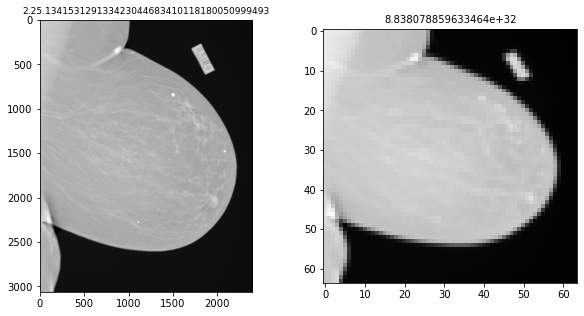

(64, 64)


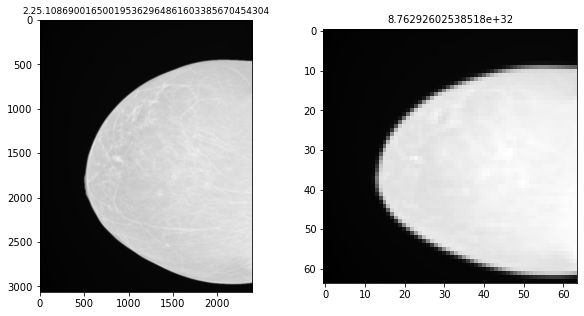

(64, 64)


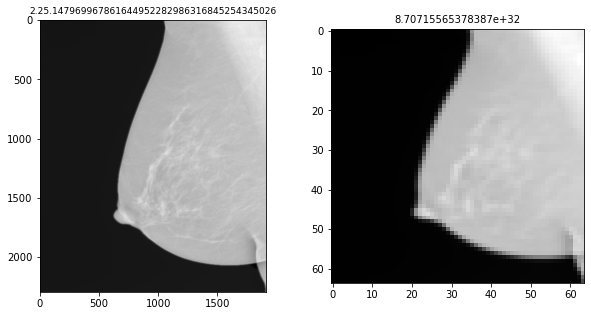

(64, 64)


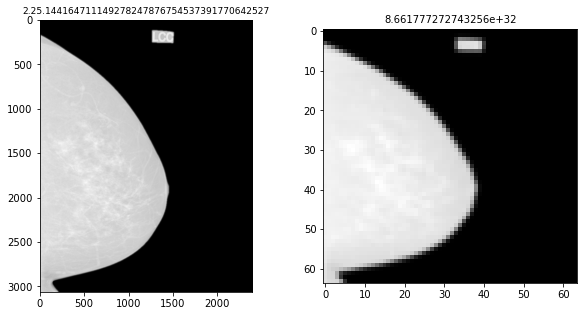

(64, 64)


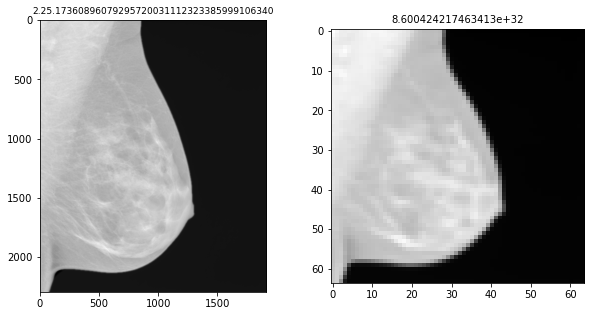

(64, 64)


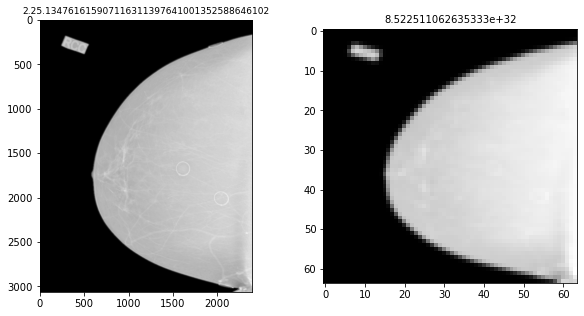

(64, 64)


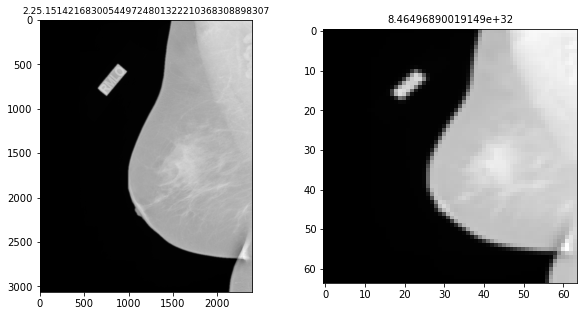

(64, 64)


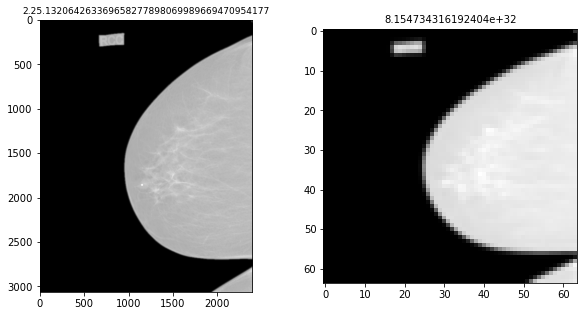

(64, 64)


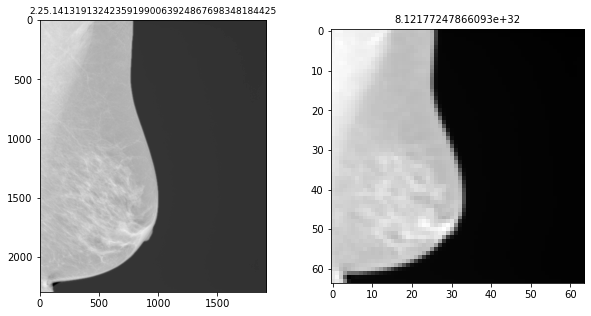

(64, 64)


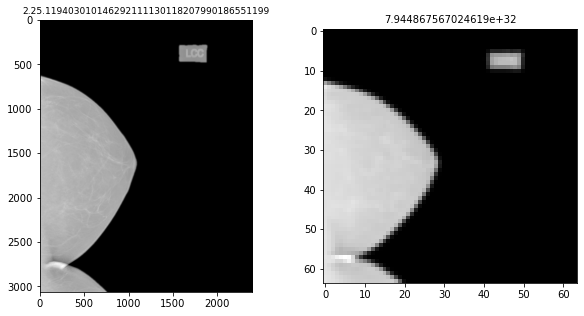

(64, 64)


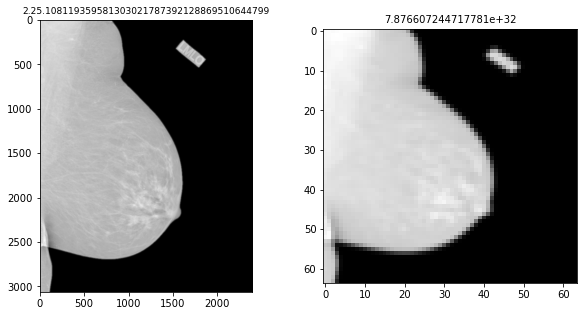

(64, 64)


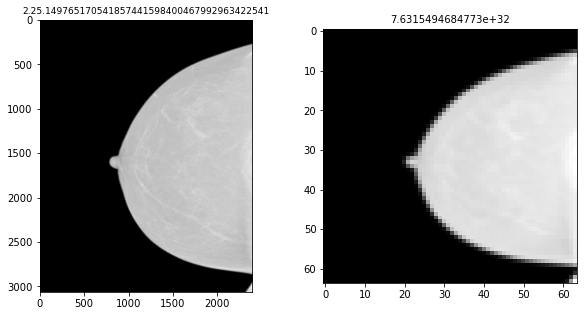

(64, 64)


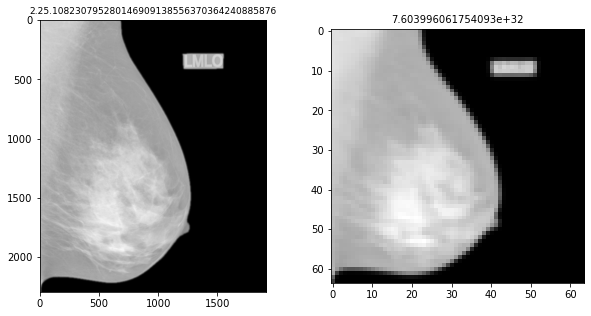

(64, 64)


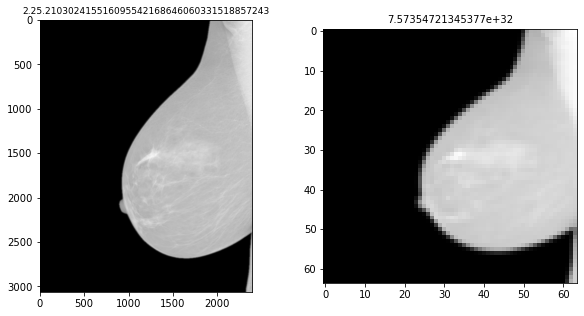

(64, 64)


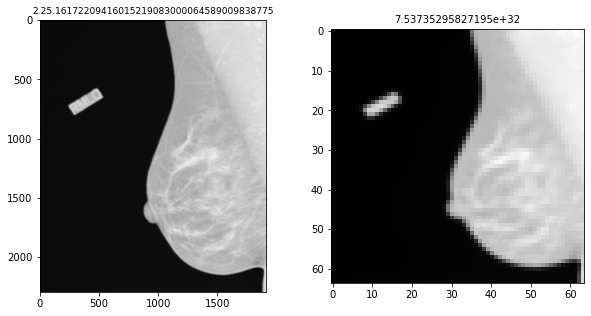

(64, 64)


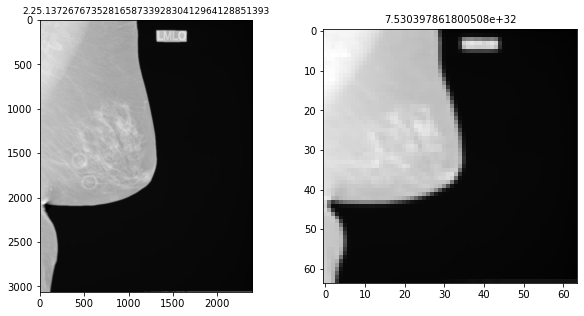

(64, 64)


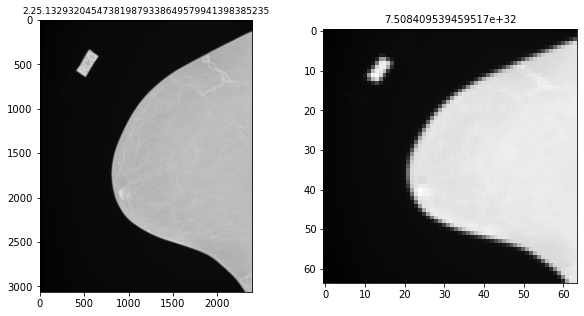

(64, 64)


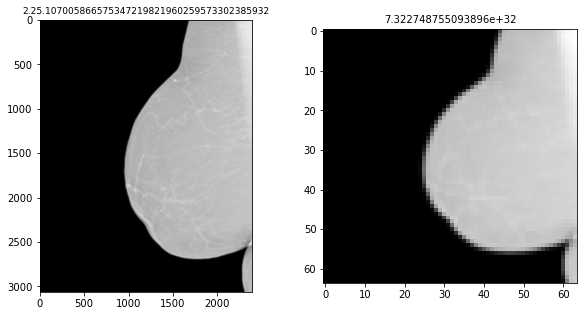

(64, 64)


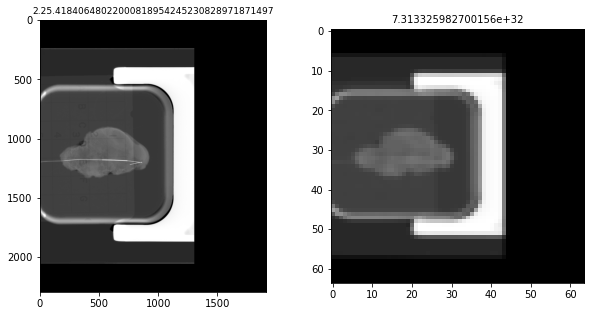

(64, 64)


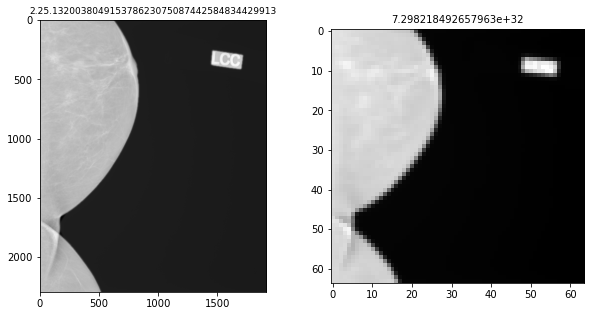

(64, 64)


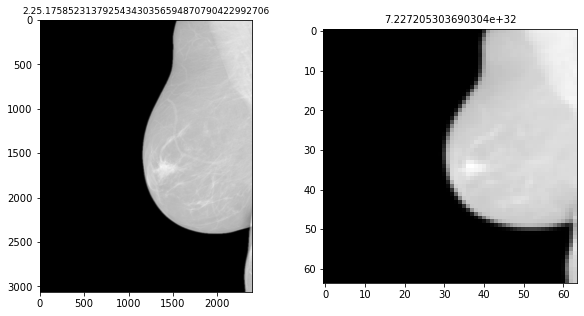

(64, 64)


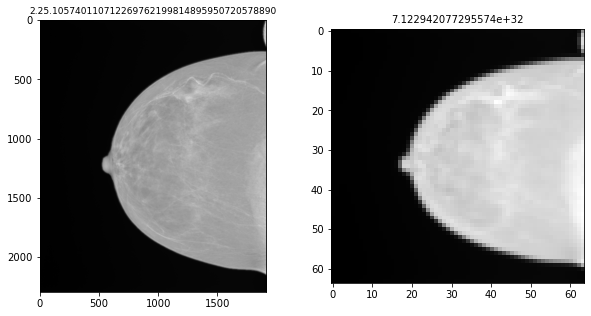

(64, 64)


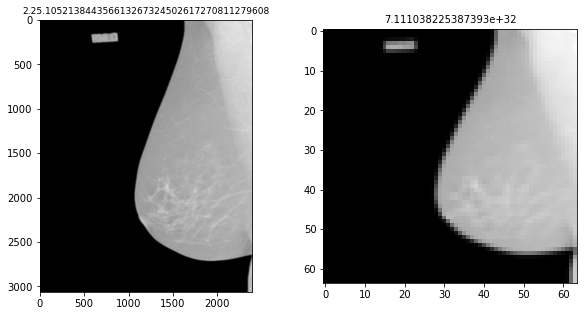

(64, 64)


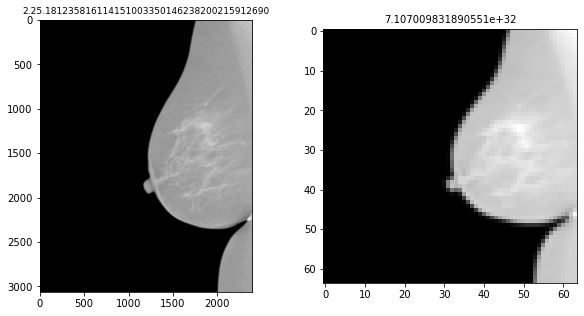

(64, 64)


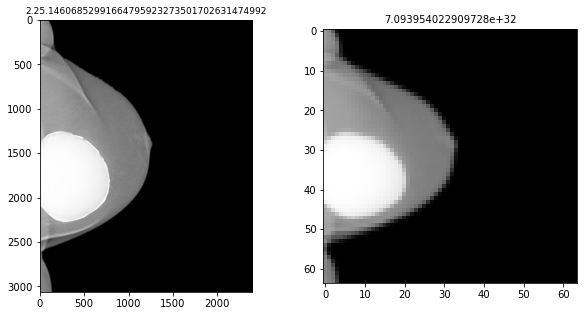

(64, 64)


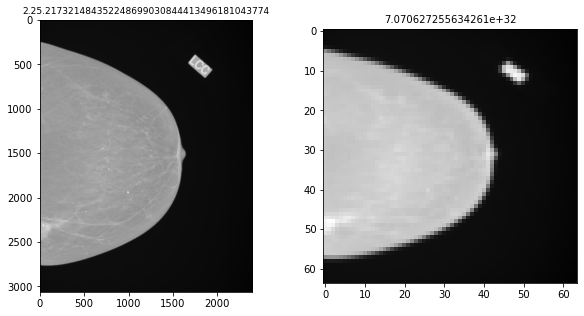

(64, 64)


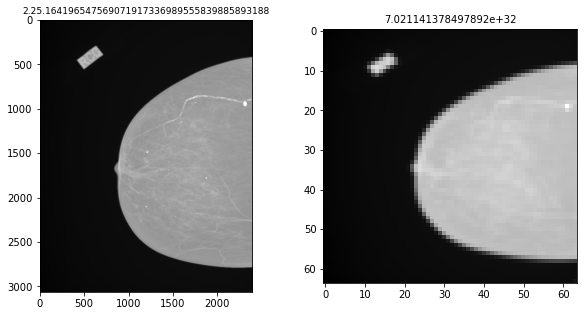

(64, 64)


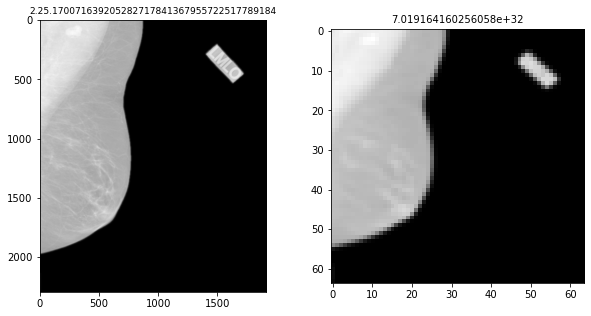

(64, 64)


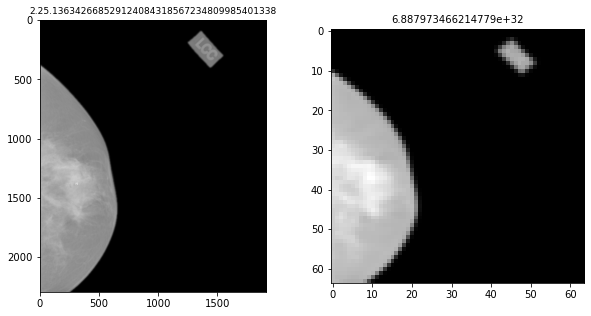

(64, 64)


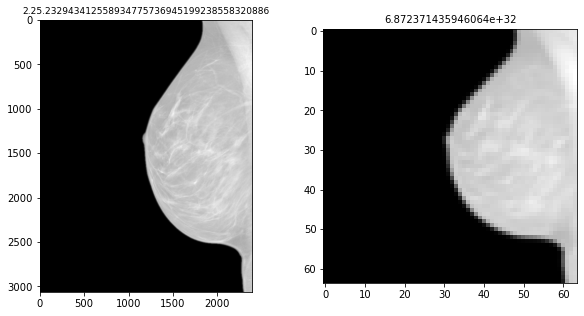

(64, 64)


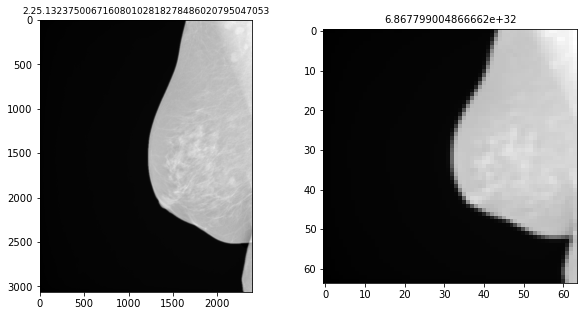

(64, 64)


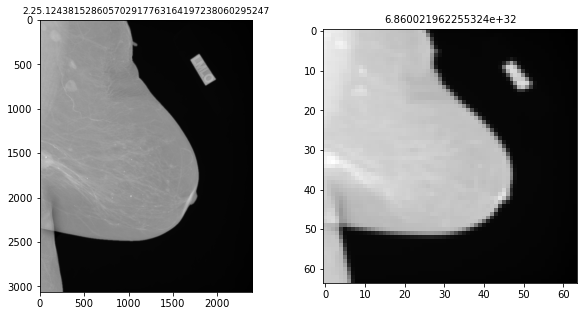

(64, 64)


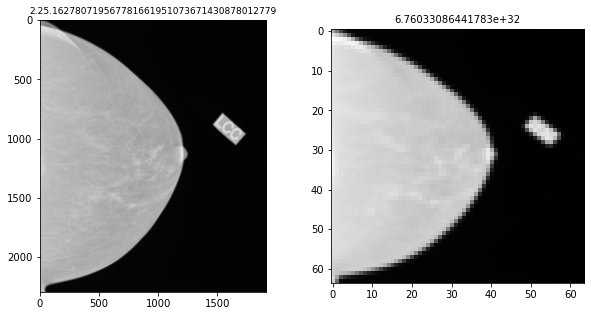

(64, 64)


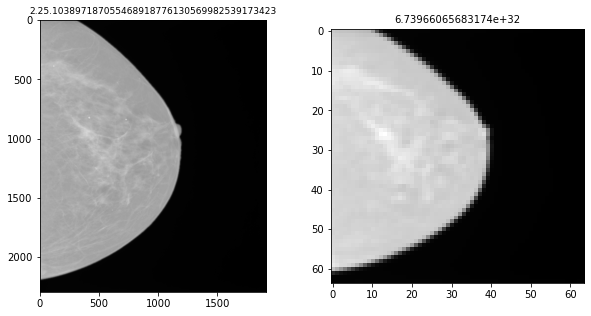

(64, 64)


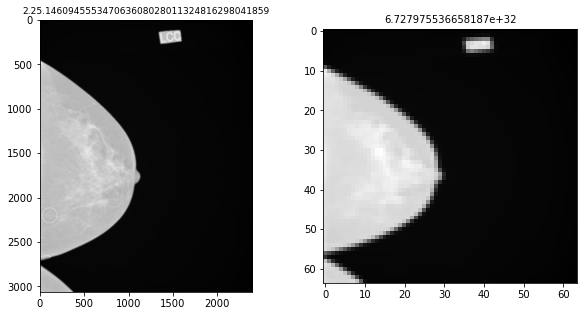

(64, 64)


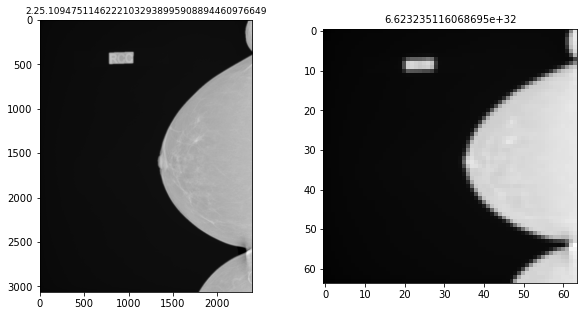

(64, 64)


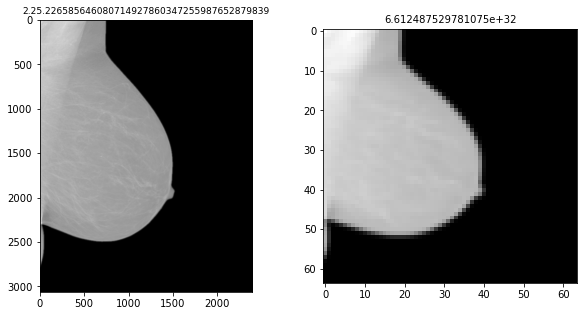

(64, 64)


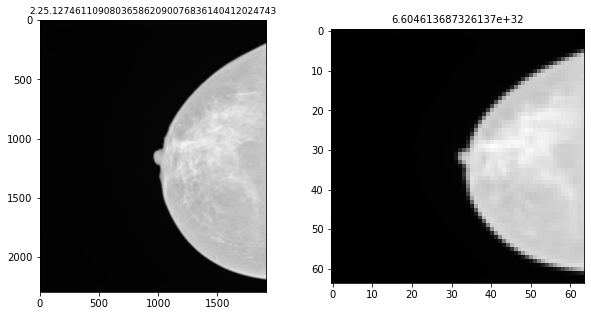

(64, 64)


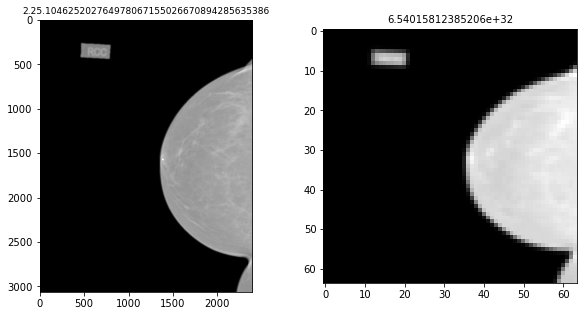

(64, 64)


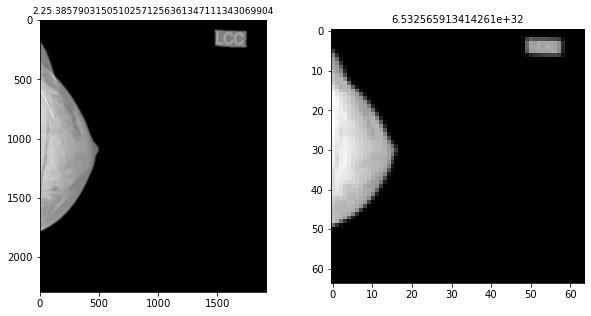

(64, 64)


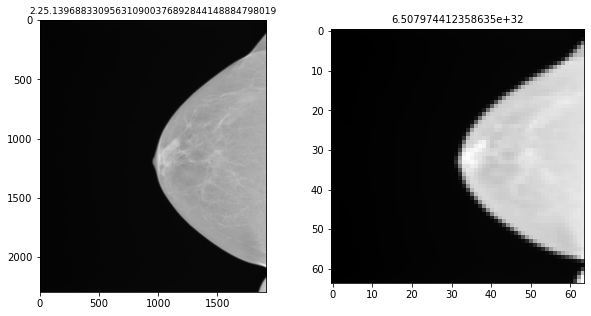

(64, 64)


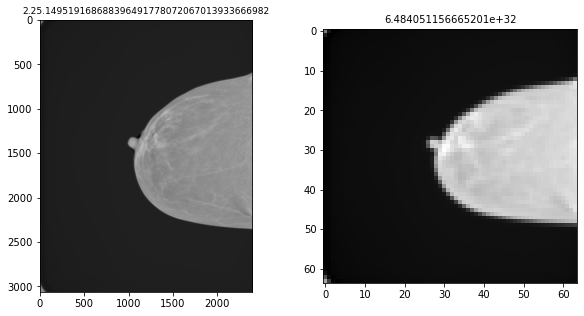

(64, 64)


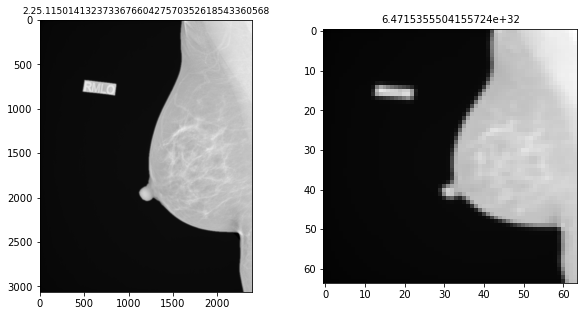

(64, 64)


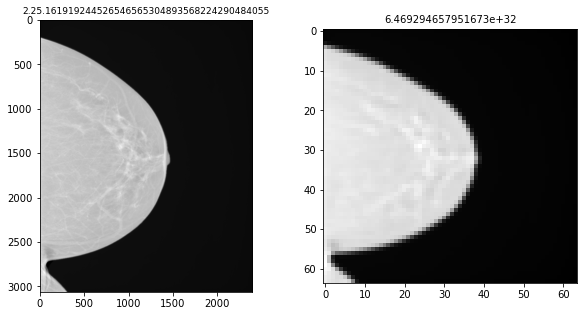

(64, 64)


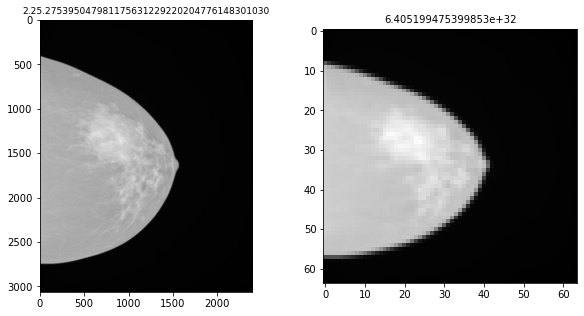

(64, 64)


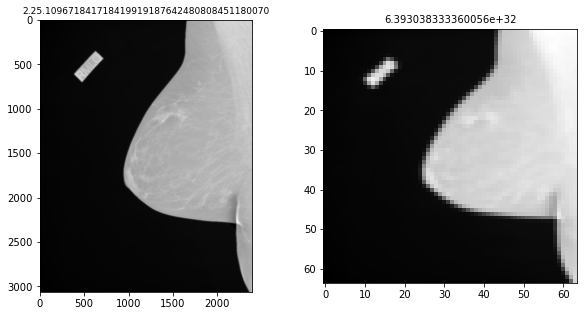

(64, 64)


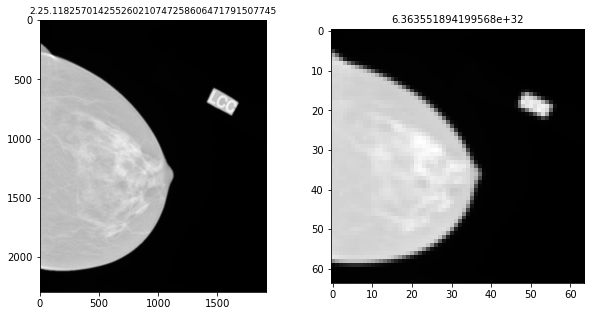

(64, 64)


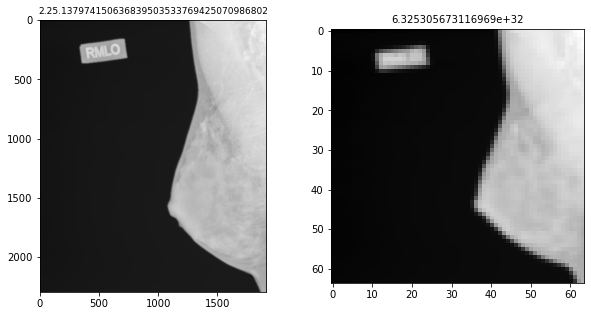

(64, 64)


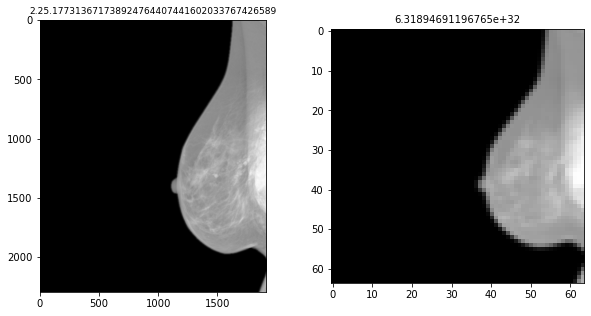

(64, 64)


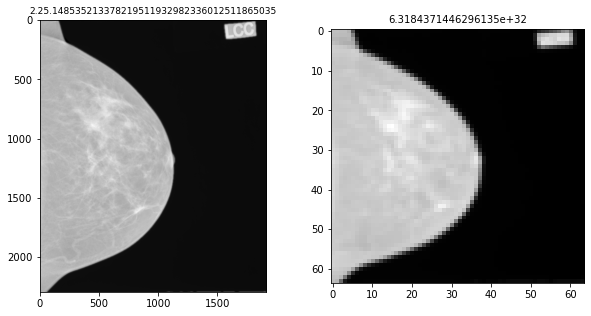

(64, 64)


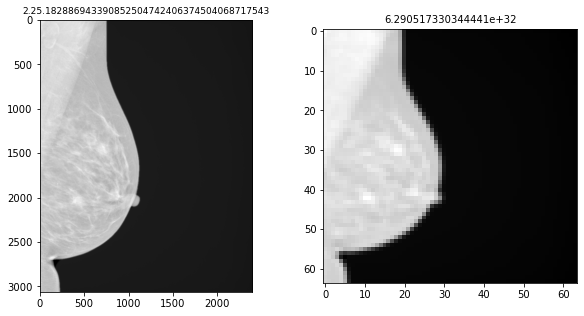

(64, 64)


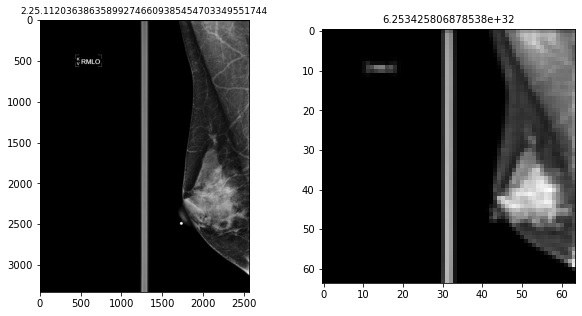

(64, 64)


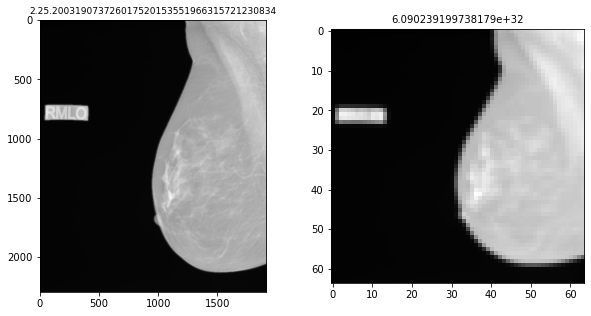

(64, 64)


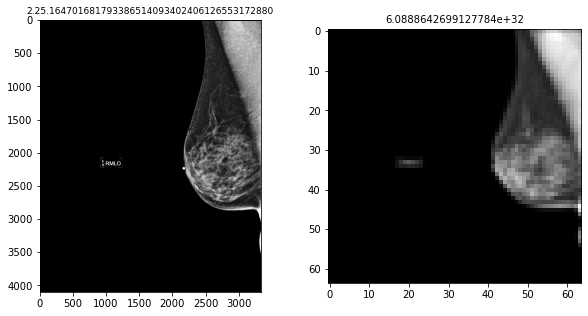

(64, 64)


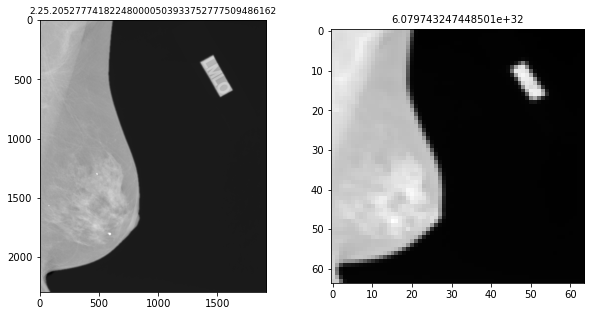

(64, 64)


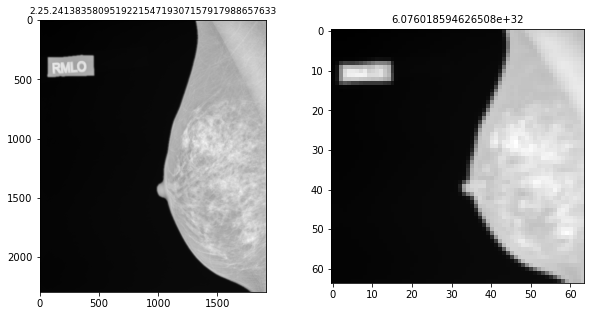

(64, 64)


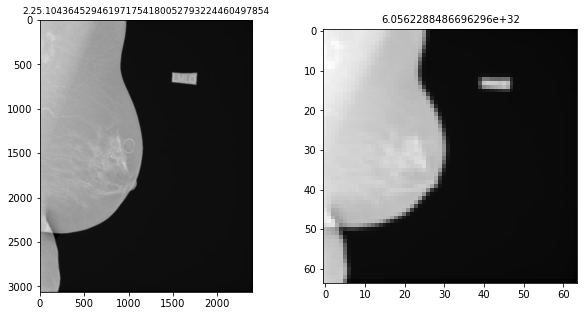

(64, 64)


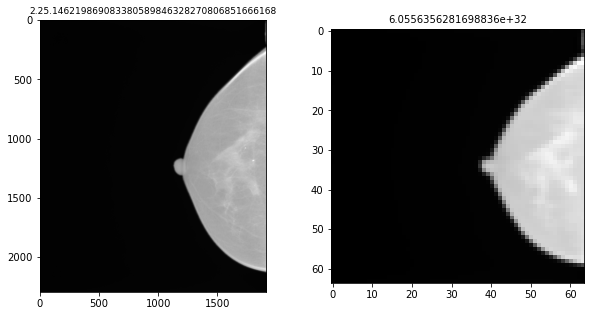

(64, 64)


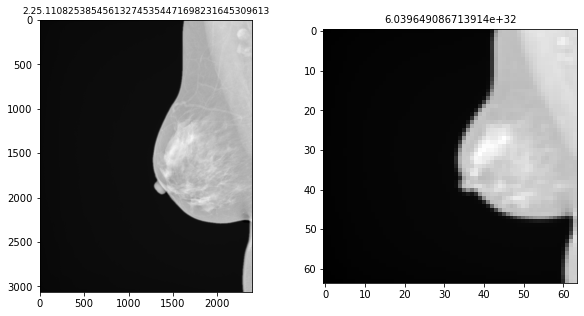

(64, 64)


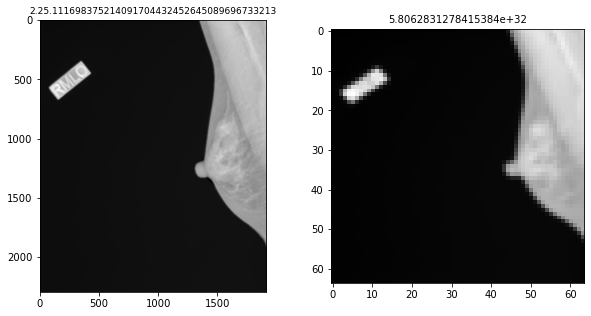

(64, 64)


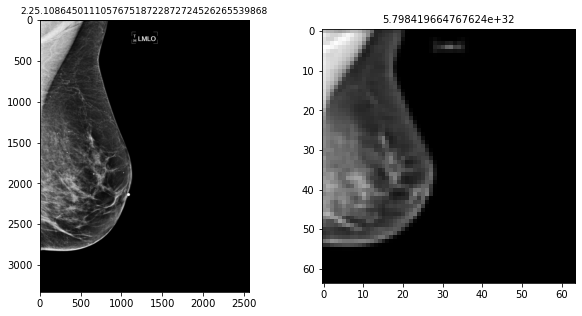

(64, 64)


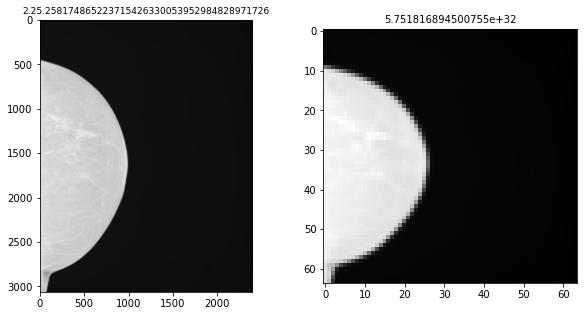

(64, 64)


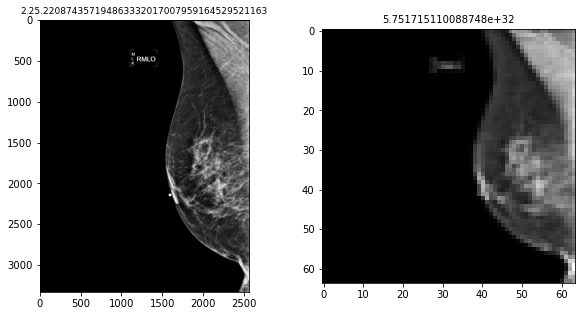

(64, 64)


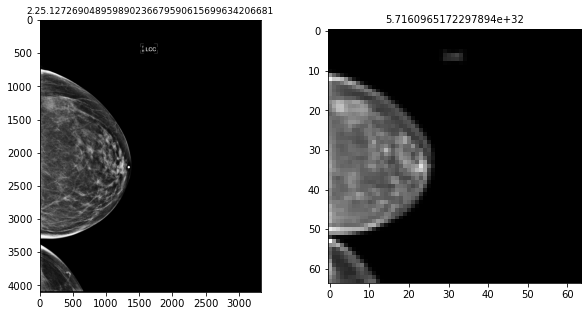

(64, 64)


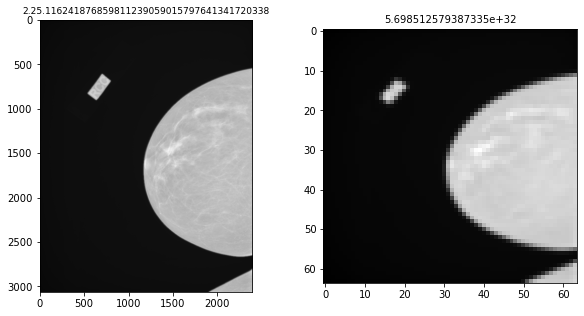

(64, 64)


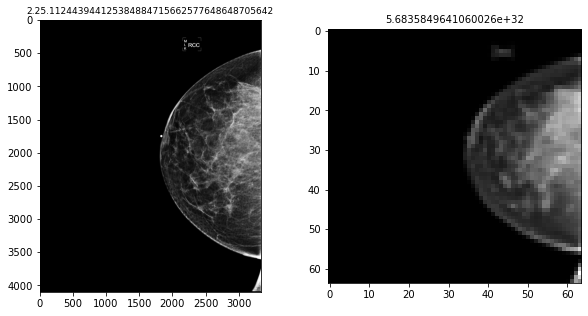

(64, 64)


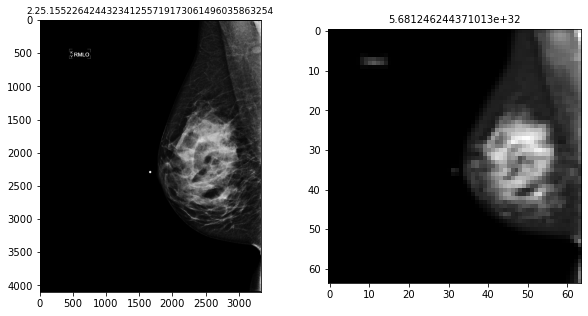

(64, 64)


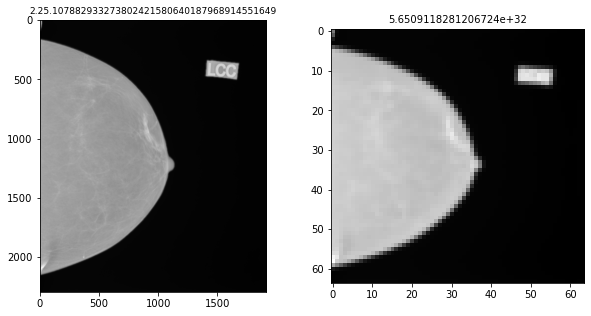

(64, 64)


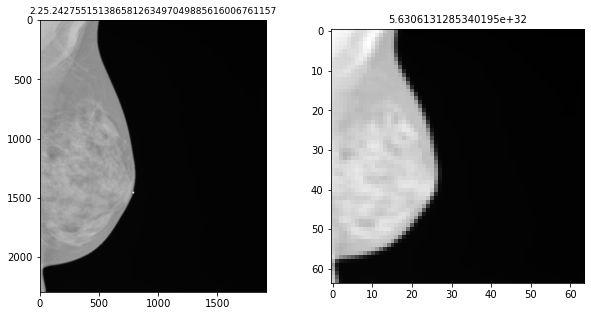

(64, 64)


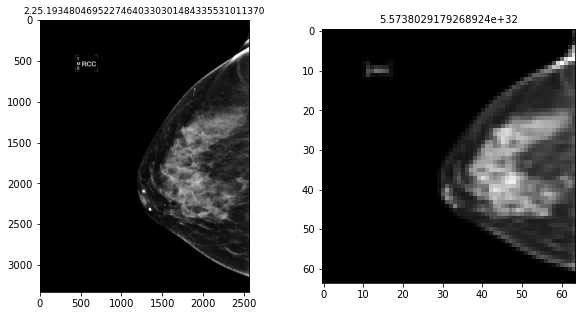

(64, 64)


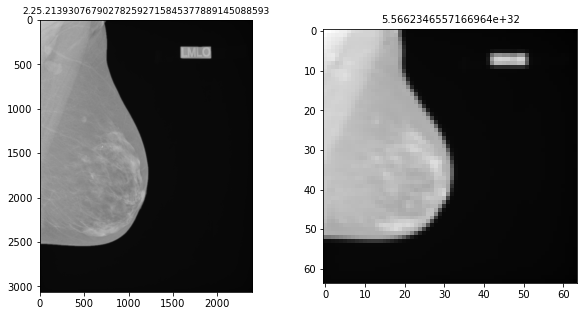

(64, 64)


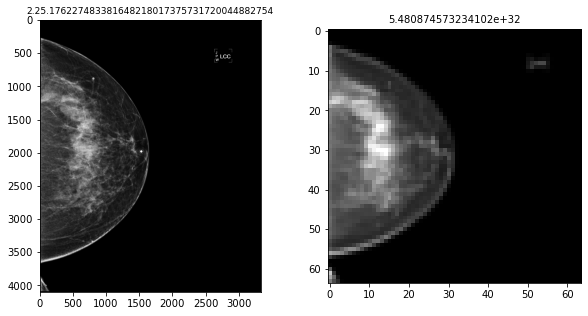

(64, 64)


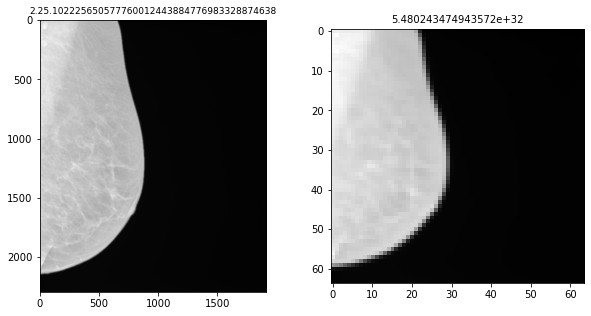

(64, 64)


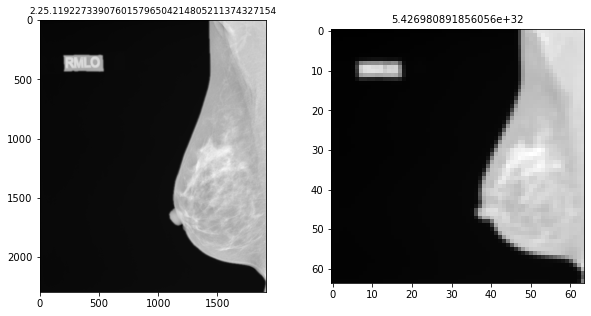

(64, 64)


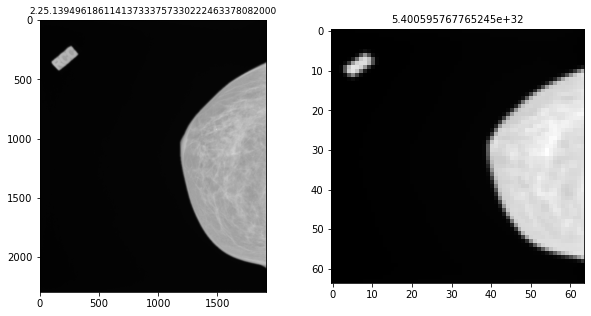

(64, 64)


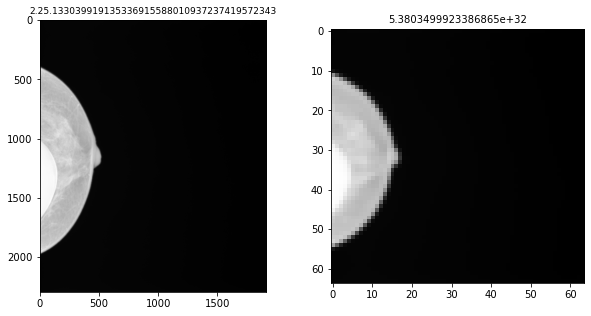

(64, 64)


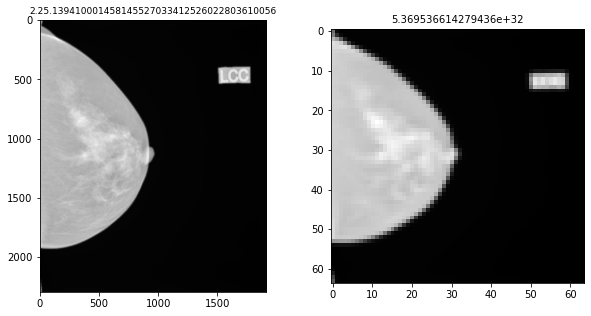

(64, 64)


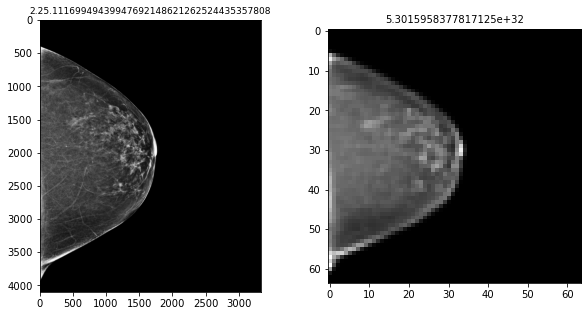

(64, 64)


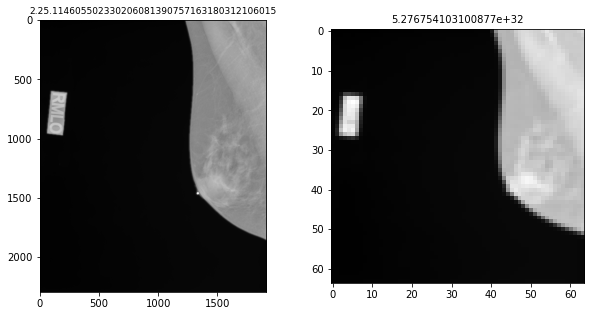

(64, 64)


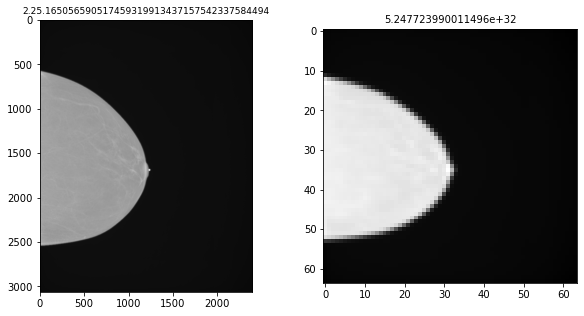

(64, 64)


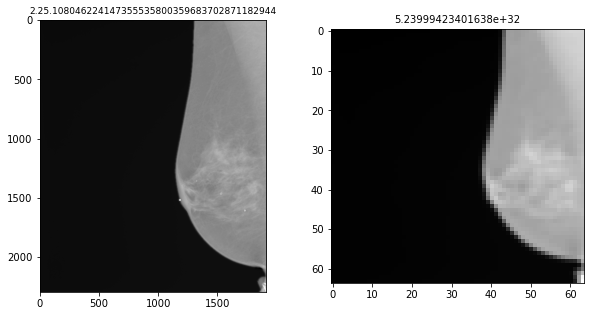

(64, 64)


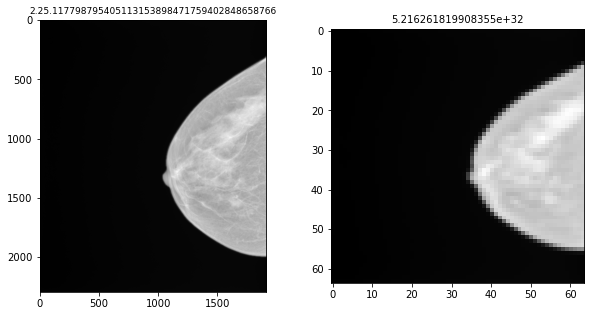

(64, 64)


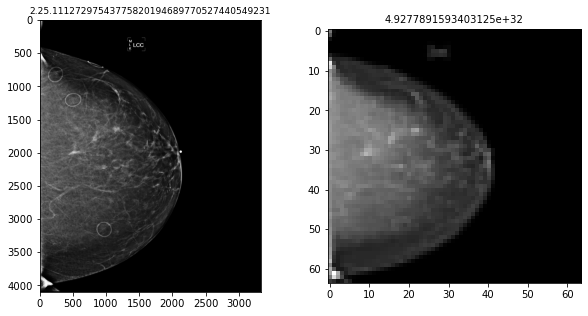

(64, 64)


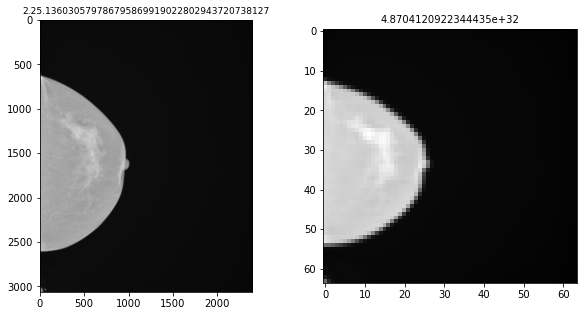

(64, 64)


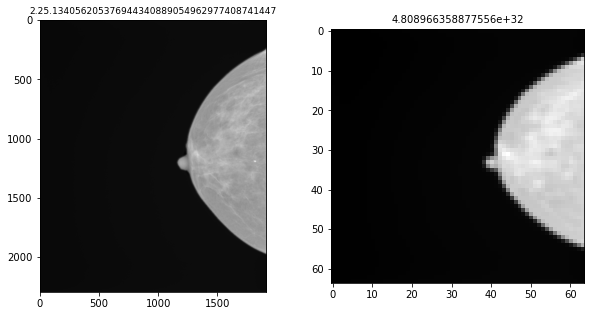

(64, 64)


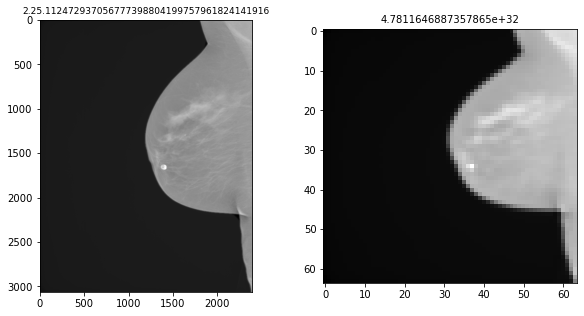

(64, 64)


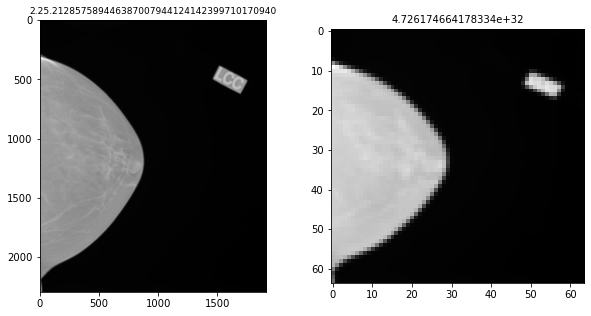

(64, 64)


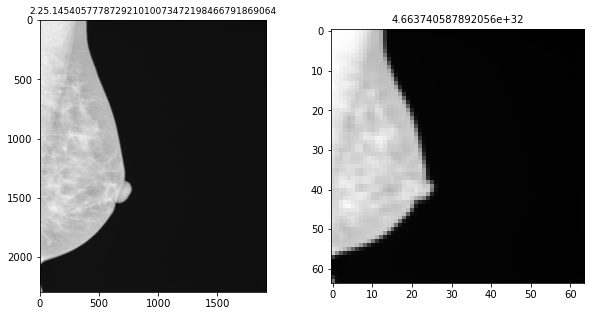

(64, 64)


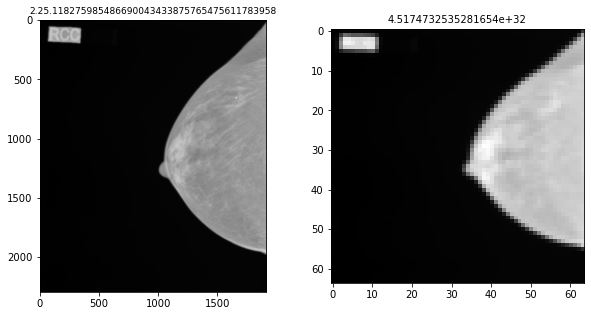

(64, 64)


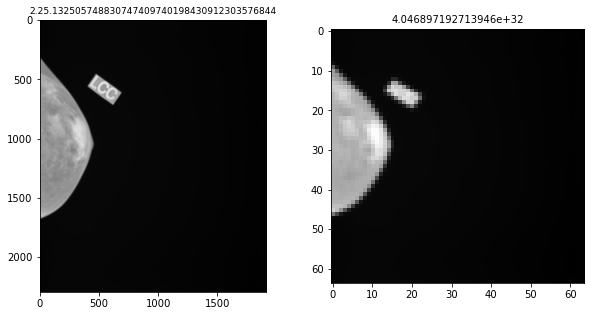

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='PCA')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])